In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Train Inner

In [2]:
train_inner = pd.read_csv('application_train_inner_merged.csv')

train_inner.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,NAME_CONTRACT_STATUS_Signed,MONTHS_BALANCE,MONTHS_BALANCE.1,CNT_INSTALMENT_LOG,CNT_INSTALMENT_LOG.1,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,DAYS_ENTRY_PAYMENT_RATIO,AMT_PAYMENT_DIFFERENCES
0,100048,0,0,0,0,1,12.218495,6,6,4,...,0.0,1.266472,0.767749,0.043016,0.688250,0.768120,0.776268,7.821250,-0.000708,0.188409
1,100135,0,0,1,0,1,11.813030,6,1,4,...,0.0,1.266472,-0.191334,0.215436,6.032220,0.659363,0.637333,9.684913,0.061707,0.188409
2,100139,0,0,0,0,0,11.967181,1,6,4,...,0.0,1.266472,-1.917683,-0.965957,-33.808493,-0.069429,-0.064093,8.788192,0.016936,0.066424
3,100180,0,0,0,0,1,12.660328,6,1,1,...,0.0,0.691023,0.038846,-0.214046,-4.280917,0.305974,0.303667,9.560450,0.013983,-1.224114
4,100211,0,0,1,0,0,12.323856,6,1,4,...,0.0,1.266472,0.691023,0.414555,6.632886,1.017882,1.026054,8.375453,0.015802,-0.126746


In [3]:
train_inner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11043 entries, 0 to 11042
Columns: 109 entries, SK_ID_CURR to AMT_PAYMENT_DIFFERENCES
dtypes: float64(57), int64(52)
memory usage: 9.2 MB


In [5]:
train_inner.isnull().sum()

SK_ID_CURR                  0
TARGET                      0
NAME_CONTRACT_TYPE          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
                           ..
DAYS_INSTALMENT             0
DAYS_ENTRY_PAYMENT          0
AMT_INSTALMENT              0
DAYS_ENTRY_PAYMENT_RATIO    0
AMT_PAYMENT_DIFFERENCES     0
Length: 109, dtype: int64

In [6]:
train_inner.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11038    False
11039    False
11040    False
11041    False
11042    False
Length: 11043, dtype: bool

### Default Rate_Inner

In [4]:
# nama dataset = application_train_inner_merged

# Hitung total peminjam
total_peminjam = len(train_inner)

# Hitung jumlah peminjam yang default (TARGET = 1)
jumlah_default = train_inner['TARGET'].sum()

# Hitung default rate
default_rate_inner = (jumlah_default / total_peminjam) * 100

print(f'Default Rate_Inner Join: {default_rate_inner:.2f}%')

Default Rate_Inner Join: 9.84%


### Distribusi Target : Inner Join

In [8]:
# Menghitung berapa banyak jumlah 0 dan 1 pada TARGET

target_counts_inner = train_inner['TARGET'].value_counts()
print(target_counts_inner)

TARGET
0    9956
1    1087
Name: count, dtype: int64


### Proporsi Target_Inner Join

In [9]:
# Untuk mengetahui ketidakseimbangan data

target_proportions_inner = train_inner['TARGET'].value_counts(normalize=True)
print(target_proportions_inner)

TARGET
0    0.901567
1    0.098433
Name: proportion, dtype: float64


### Data mentah tanpa pre-processing

In [21]:
X = train_inner.drop(columns = ['SK_ID_CURR', 'TARGET'])
y = train_inner['TARGET']

y.value_counts(normalize = True)

TARGET
0    0.901567
1    0.098433
Name: proportion, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 884, number of negative: 7950
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10167
[LightGBM] [Info] Number of data points in the train set: 8834, number of used features: 89
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.100068 -> initscore=-2.196470
[LightGBM] [Info] Start training from score -2.196470
Accuracy (Train Set)    : 0.97
Accuracy (Test Set)     : 0.91
Precision (Train Set)   : 1.00
Precision (Test Set)    : 0.58
Recall (Train Set)      : 0.67
Recall (Test Set)       : 0.03
F1-Score (Train Set)    : 0.80
F1-Score (Test Set)     : 0.07
ROC-AUC (Train-Proba)   : 1.00
ROC-AUC (Test-Proba)    : 0.71
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8

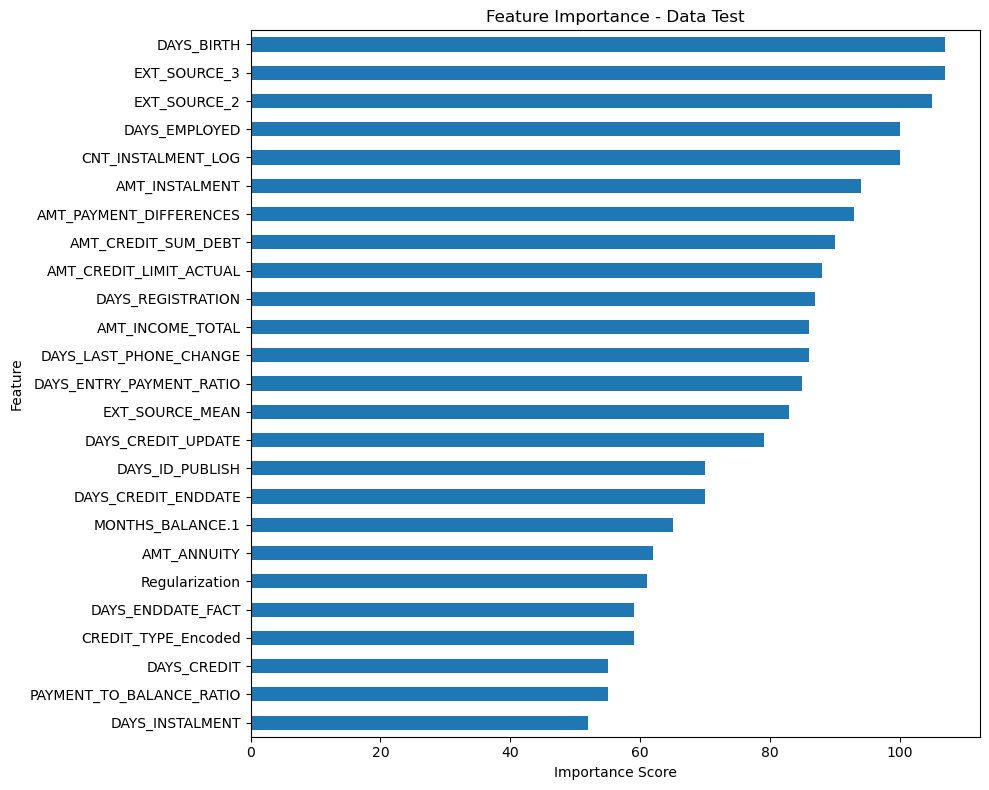

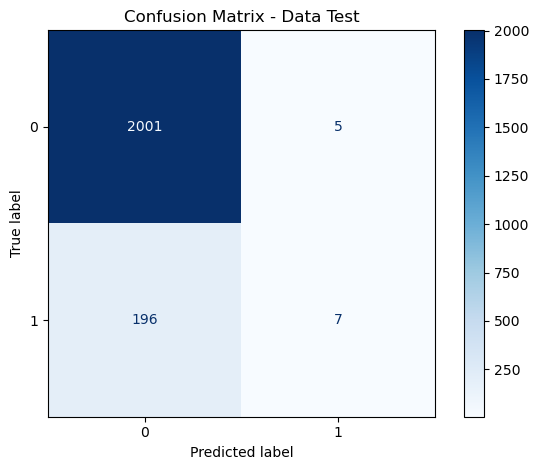

In [24]:
# Melatih model LightGBM
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train, y_train)

# Evaluasi model dengan metrik seperti accuracy, precision, recall, dsb.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def eval_classification(model):
    y_pred = model.predict(X_test)  # Prediksi untuk data test
    y_pred_train = model.predict(X_train)  # Prediksi untuk data train
    y_pred_proba = model.predict_proba(X_test)  # Probabilitas prediksi untuk data test
    y_pred_proba_train = model.predict_proba(X_train)  # Probabilitas prediksi untuk data train
    
    # Mencetak hasil evaluasi
    print('Accuracy (Train Set)    : %.2f' % accuracy_score(y_train, y_pred_train))
    print('Accuracy (Test Set)     : %.2f' % accuracy_score(y_test, y_pred))

    print('Precision (Train Set)   : %.2f' % precision_score(y_train, y_pred_train))
    print('Precision (Test Set)    : %.2f' % precision_score(y_test, y_pred))

    print('Recall (Train Set)      : %.2f' % recall_score(y_train, y_pred_train))
    print('Recall (Test Set)       : %.2f' % recall_score(y_test, y_pred))

    print('F1-Score (Train Set)    : %.2f' % f1_score(y_train, y_pred_train))
    print('F1-Score (Test Set)     : %.2f' % f1_score(y_test, y_pred))

    print('ROC-AUC (Train-Proba)   : %.2f' % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print('ROC-AUC (Test-Proba)    : %.2f' % roc_auc_score(y_test, y_pred_proba[:, 1]))

# Evaluasi model
eval_classification(lgb)

# Cross-validation untuk mengukur performa model secara lebih robust
from sklearn.model_selection import cross_validate
def score_cross_validate(model):
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('Recall (Crossval Train) : %.2f' % score['train_score'].mean())
    print('Recall (Crossval Test)  : %.2f' % score['test_score'].mean())

score_cross_validate(lgb)

# Menampilkan fitur yang paling penting berdasarkan model
import pandas as pd
import matplotlib.pyplot as plt

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()  # Membalik urutan fitur berdasarkan skor
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance - Data Test')
    plt.tight_layout()
    plt.show()

show_feature_importance(lgb)

# Menampilkan confusion matrix untuk hasil prediksi
def show_confusion_matrix(model):
    cm = confusion_matrix(y_test, model.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix - Data Test')
    plt.tight_layout()
    plt.show()

show_confusion_matrix(lgb)

In [25]:
def calculate_default_rate(model, X, y, dataset_name="dataset"):
    """
    Menghitung default rate berdasarkan probabilitas yang diprediksi oleh model.
    
    Parameter:
    - model: Model yang sudah dilatih untuk melakukan prediksi.
    - X: Fitur untuk dataset (train atau test).
    - y: Nilai target yang sesungguhnya (1 = default, 0 = tidak default).
    - dataset_name: Nama dataset yang sedang dievaluasi (train atau test).
    
    Output:
    - default_rate: Proporsi prediksi default pada dataset yang diberikan.
    """
    # Mendapatkan probabilitas prediksi untuk kelas 1 (default)
    y_pred_proba = model.predict_proba(X)[:, 1]
    
    # Mengonversi probabilitas menjadi prediksi default (threshold 0.5)
    y_pred_default = (y_pred_proba > 0.5).astype(int)
    
    # Menghitung jumlah prediksi default (jumlah yang diprediksi = 1)
    default_count = sum(y_pred_default)
    total_count = len(y_pred_default)
    
    # Menghitung default rate
    default_rate = default_count / total_count if total_count > 0 else 0
    
    # Menampilkan hasil default rate
    print(f"Default rate untuk dataset {dataset_name}:")
    print(f"Jumlah prediksi default: {default_count}")
    print(f"Jumlah total: {total_count}")
    print(f"Tingkat default prediksi: {default_rate:.2%}")

In [26]:
# 9. Menghitung default rate untuk train dan test set
calculate_default_rate(lgb, X_train, y_train, dataset_name="train")
calculate_default_rate(lgb, X_test, y_test, dataset_name="test")

Default rate untuk dataset train:
Jumlah prediksi default: 591
Jumlah total: 8834
Tingkat default prediksi: 6.69%
Default rate untuk dataset test:
Jumlah prediksi default: 12
Jumlah total: 2209
Tingkat default prediksi: 0.54%


### Undersampling

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from lightgbm import LGBMClassifier

In [4]:
# Assuming 'train_inner' is your dataset
X = train_inner.drop(columns=['SK_ID_CURR', 'TARGET'])
y = train_inner['TARGET']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
# Undersampling the train set
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [6]:
# LightGBM model training
model = LGBMClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Making predictions for train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Predict probabilities for train and test sets
y_train_proba = model.predict_proba(X_train)[:, 1]
y_test_proba = model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_roc_auc = roc_auc_score(y_train, y_train_proba)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

# Print evaluation metrics
print(f'Accuracy (Train Set): {train_accuracy:.2f}')
print(f'Accuracy (Test Set): {test_accuracy:.2f}')
print(f'Precision (Train Set): {train_precision:.2f}')
print(f'Precision (Test Set): {test_precision:.2f}')
print(f'Recall (Train Set): {train_recall:.2f}')
print(f'Recall (Test Set): {test_recall:.2f}')
print(f'F1-Score (Train Set): {train_f1:.2f}')
print(f'F1-Score (Test Set): {test_f1:.2f}')
print(f'ROC-AUC (Train-Proba): {train_roc_auc:.2f}')
print(f'ROC-AUC (Test-Proba): {test_roc_auc:.2f}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 870, number of negative: 870
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9280
[LightGBM] [Info] Number of data points in the train set: 1740, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy (Train Set): 0.71
Accuracy (Test Set): 0.65
Precision (Train Set): 0.25
Precision (Test Set): 0.16
Recall (Train Set): 1.00
Recall (Test Set): 0.58
F1-Score (Train Set): 0.40
F1-Score (Test Set): 0.25
ROC-AUC (Train-Proba): 0.96
ROC-AUC (Test-Proba): 0.68



Confusion Matrix (Train Set):
[[5386 2578]
 [   0  870]]

Confusion Matrix (Test Set):
[[1314  678]
 [  91  126]]


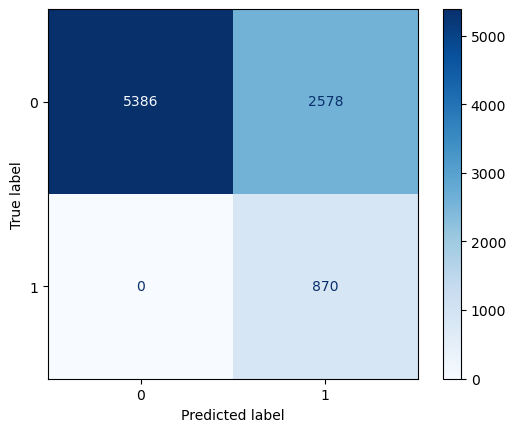

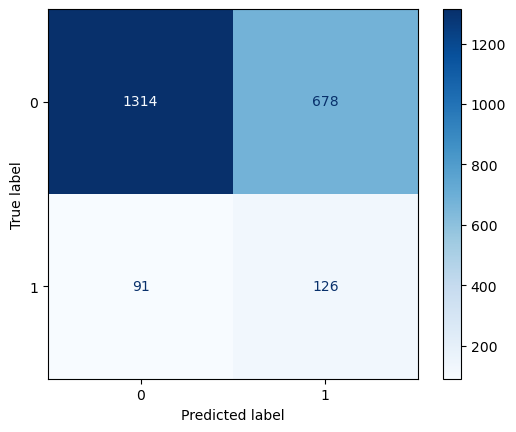

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrices for train and test sets
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrices
print("\nConfusion Matrix (Train Set):")
print(train_cm)
print("\nConfusion Matrix (Test Set):")
print(test_cm)

# Optionally, display the confusion matrices visually
ConfusionMatrixDisplay(train_cm, display_labels=model.classes_).plot(cmap="Blues")
ConfusionMatrixDisplay(test_cm, display_labels=model.classes_).plot(cmap="Blues")


In [8]:
# Function to calculate default rate
def calculate_default_rate(model, X, y, dataset_name="dataset"):
    """
    Menghitung default rate berdasarkan probabilitas yang diprediksi oleh model.
    
    Parameter:
    - model: Model yang sudah dilatih untuk melakukan prediksi.
    - X: Fitur untuk dataset (train atau test).
    - y: Nilai target yang sesungguhnya (1 = default, 0 = tidak default).
    - dataset_name: Nama dataset yang sedang dievaluasi (train atau test).
    
    Output:
    - default_rate: Proporsi prediksi default pada dataset yang diberikan.
    """
    # Mendapatkan probabilitas prediksi untuk kelas 1 (default)
    y_pred_proba = model.predict_proba(X)[:, 1]  # Menggunakan prediksi probabilitas
    
    # Mengonversi probabilitas menjadi prediksi default (threshold 0.5)
    y_pred_default = (y_pred_proba > 0.5).astype(int)
    
    # Menghitung jumlah prediksi default (jumlah yang diprediksi = 1)
    default_count = sum(y_pred_default)
    total_count = len(y_pred_default)
    
    # Menghitung default rate
    default_rate = default_count / total_count if total_count > 0 else 0
    
    # Menampilkan hasil default rate
    print(f"\nDefault rate untuk dataset {dataset_name}:")
    print(f"Jumlah prediksi default: {default_count}")
    print(f"Jumlah total: {total_count}")
    print(f"Tingkat default prediksi: {default_rate:.2%}")

# Calculate default rate for train and test sets
calculate_default_rate(model, X_train, y_train, dataset_name="Train")
calculate_default_rate(model, X_test, y_test, dataset_name="Test")


Default rate untuk dataset Train:
Jumlah prediksi default: 3448
Jumlah total: 8834
Tingkat default prediksi: 39.03%

Default rate untuk dataset Test:
Jumlah prediksi default: 804
Jumlah total: 2209
Tingkat default prediksi: 36.40%


### Class Weight

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from lightgbm import LGBMClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

In [4]:
# Assuming 'train_inner' is your dataset
X = train_inner.drop(columns=['SK_ID_CURR', 'TARGET'])
y = train_inner['TARGET']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
# Calculate class weights
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

# LightGBM model training with class weights
model = LGBMClassifier(random_state=42, class_weight=class_weight_dict)
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 870, number of negative: 7964
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10176
[LightGBM] [Info] Number of data points in the train set: 8834, number of used features: 89
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


LGBMClassifier(class_weight={0: 0.5546207935710699, 1: 5.077011494252874},
               random_state=42)

In [6]:
# Making predictions for train and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Predict probabilities for train and test sets
y_train_proba = model.predict_proba(X_train)[:, 1]
y_test_proba = model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)

train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

train_roc_auc = roc_auc_score(y_train, y_train_proba)
test_roc_auc = roc_auc_score(y_test, y_test_proba)

# Print evaluation metrics
print(f'Accuracy (Train Set): {train_accuracy:.2f}')
print(f'Accuracy (Test Set): {test_accuracy:.2f}')
print(f'Precision (Train Set): {train_precision:.2f}')
print(f'Precision (Test Set): {test_precision:.2f}')
print(f'Recall (Train Set): {train_recall:.2f}')
print(f'Recall (Test Set): {test_recall:.2f}')
print(f'F1-Score (Train Set): {train_f1:.2f}')
print(f'F1-Score (Test Set): {test_f1:.2f}')
print(f'ROC-AUC (Train-Proba): {train_roc_auc:.2f}')
print(f'ROC-AUC (Test-Proba): {test_roc_auc:.2f}')

Accuracy (Train Set): 0.96
Accuracy (Test Set): 0.83
Precision (Train Set): 0.69
Precision (Test Set): 0.22
Recall (Train Set): 1.00
Recall (Test Set): 0.29
F1-Score (Train Set): 0.81
F1-Score (Test Set): 0.25
ROC-AUC (Train-Proba): 1.00
ROC-AUC (Test-Proba): 0.70


In [7]:
# Function to calculate default rate
def calculate_default_rate(model, X, y, dataset_name="dataset"):
    """
    Menghitung default rate berdasarkan probabilitas yang diprediksi oleh model.
    
    Parameter:
    - model: Model yang sudah dilatih untuk melakukan prediksi.
    - X: Fitur untuk dataset (train atau test).
    - y: Nilai target yang sesungguhnya (1 = default, 0 = tidak default).
    - dataset_name: Nama dataset yang sedang dievaluasi (train atau test).
    
    Output:
    - default_rate: Proporsi prediksi default pada dataset yang diberikan.
    """
    # Mendapatkan probabilitas prediksi untuk kelas 1 (default)
    y_pred_proba = model.predict_proba(X)[:, 1]  # Menggunakan prediksi probabilitas
    
    # Mengonversi probabilitas menjadi prediksi default (threshold 0.5)
    y_pred_default = (y_pred_proba > 0.5).astype(int)
    
    # Menghitung jumlah prediksi default (jumlah yang diprediksi = 1)
    default_count = sum(y_pred_default)
    total_count = len(y_pred_default)
    
    # Menghitung default rate
    default_rate = default_count / total_count if total_count > 0 else 0
    
    # Menampilkan hasil default rate
    print(f"\nDefault rate untuk dataset {dataset_name}:")
    print(f"Jumlah prediksi default: {default_count}")
    print(f"Jumlah total: {total_count}")
    print(f"Tingkat default prediksi: {default_rate:.2%}")

# Calculate default rate for train and test sets
calculate_default_rate(model, X_train, y_train, dataset_name="Train")
calculate_default_rate(model, X_test, y_test, dataset_name="Test")


Default rate untuk dataset Train:
Jumlah prediksi default: 1264
Jumlah total: 8834
Tingkat default prediksi: 14.31%

Default rate untuk dataset Test:
Jumlah prediksi default: 277
Jumlah total: 2209
Tingkat default prediksi: 12.54%



Confusion Matrix (Train Set):
[[7569  395]
 [   1  869]]

Confusion Matrix (Test Set):
[[1777  215]
 [ 155   62]]


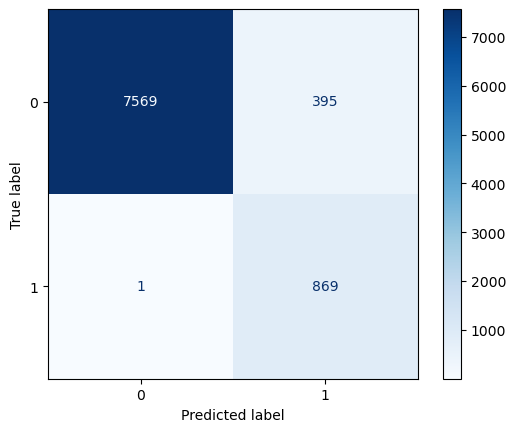

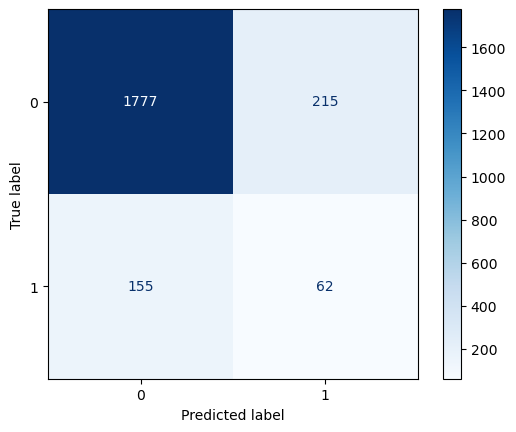

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrices for train and test sets
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrices
print("\nConfusion Matrix (Train Set):")
print(train_cm)
print("\nConfusion Matrix (Test Set):")
print(test_cm)

# Optionally, display the confusion matrices visually
ConfusionMatrixDisplay(train_cm, display_labels=model.classes_).plot(cmap="Blues")
ConfusionMatrixDisplay(test_cm, display_labels=model.classes_).plot(cmap="Blues")


### Scaler

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [5]:
# Assuming 'train_inner' is your dataset
X = train_inner.drop(columns=['SK_ID_CURR', 'TARGET'])
y = train_inner['TARGET']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# Scaling the features for better model performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# LightGBM model setup using LGBMClassifier
lgb_model = lgb.LGBMClassifier(
    objective='binary',        # Binary classification
    metric='binary_error',     # Evaluate using binary classification error
    boosting_type='gbdt',      # Gradient Boosting Decision Tree
    num_leaves=31,             # Number of leaves in the tree
    learning_rate=0.05,        # Learning rate
    feature_fraction=0.9,      # Fraction of features to use
    bagging_fraction=0.8,      # Fraction of data to use
    bagging_freq=5,            # Frequency for bagging
    max_depth=10,              # Maximum depth of tree
    random_state=42
)

# Train the model without early stopping
lgb_model.fit(X_train_scaled, y_train)

# Predict probabilities (for ROC-AUC)
y_train_pred_proba = lgb_model.predict_proba(X_train_scaled)[:, 1]
y_test_pred_proba = lgb_model.predict_proba(X_test_scaled)[:, 1]

# Convert probabilities to binary predictions (threshold=0.5)
y_train_pred = (y_train_pred_proba >= 0.5).astype(int)
y_test_pred = (y_test_pred_proba >= 0.5).astype(int)

# Evaluate the model on both train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred_proba)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

# Print metrics
print(f'Accuracy (Train Set): {train_accuracy:.2f}')
print(f'Accuracy (Test Set): {test_accuracy:.2f}')
print(f'Precision (Train Set): {train_precision:.2f}')
print(f'Precision (Test Set): {test_precision:.2f}')
print(f'Recall (Train Set): {train_recall:.2f}')
print(f'Recall (Test Set): {test_recall:.2f}')
print(f'F1-Score (Train Set): {train_f1:.2f}')
print(f'F1-Score (Test Set): {test_f1:.2f}')
print(f'ROC-AUC (Train-Proba): {train_roc_auc:.2f}')
print(f'ROC-AUC (Test-Proba): {test_roc_auc:.2f}')

# Define the calculate_default_rate function
def calculate_default_rate(model, X, y, dataset_name="dataset"):
    """
    Menghitung default rate berdasarkan probabilitas yang diprediksi oleh model.
    
    Parameter:
    - model: Model yang sudah dilatih untuk melakukan prediksi.
    - X: Fitur untuk dataset (train atau test).
    - y: Nilai target yang sesungguhnya (1 = default, 0 = tidak default).
    - dataset_name: Nama dataset yang sedang dievaluasi (train atau test).
    
    Output:
    - default_rate: Proporsi prediksi default pada dataset yang diberikan.
    """
    # Mendapatkan probabilitas prediksi untuk kelas 1 (default)
    y_pred_proba = model.predict_proba(X)[:, 1]  # Menggunakan prediksi probabilitas
    
    # Mengonversi probabilitas menjadi prediksi default (threshold 0.5)
    y_pred_default = (y_pred_proba > 0.5).astype(int)
    
    # Menghitung jumlah prediksi default (jumlah yang diprediksi = 1)
    default_count = sum(y_pred_default)
    total_count = len(y_pred_default)
    
    # Menghitung default rate
    default_rate = default_count / total_count if total_count > 0 else 0
    
    # Menampilkan hasil default rate
    print(f"\nDefault rate untuk dataset {dataset_name}:")
    print(f"Jumlah prediksi default: {default_count}")
    print(f"Jumlah total: {total_count}")
    print(f"Tingkat default prediksi: {default_rate:.2%}")

# 9. Menghitung default rate untuk train dan test set
calculate_default_rate(lgb_model, X_train_scaled, y_train, dataset_name="train")
calculate_default_rate(lgb_model, X_test_scaled, y_test, dataset_name="test")

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Info] Number of positive: 870, number of negative: 7964
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGB

### Hadling Outliers (IQR)

In [14]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [15]:
X = train_inner.drop(columns = ['SK_ID_CURR', 'TARGET'])
y = train_inner['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
# Proses IQR pada data train
def handle_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap outliers pada data train
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

# Pilih kolom numerik untuk IQR
numeric_columns = X_train.select_dtypes(include=np.number).columns

# Terapkan IQR hanya pada data train
X_train = handle_outliers_iqr(X_train.copy(), numeric_columns)

# Terapkan capping pada data test menggunakan batas dari data train
def apply_train_iqr_bounds(data, train_data, columns):
    for col in columns:
        Q1 = train_data[col].quantile(0.25)
        Q3 = train_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap outliers pada data test
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

X_test = apply_train_iqr_bounds(X_test.copy(), X_train, numeric_columns)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 884, number of negative: 7950
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9150
[LightGBM] [Info] Number of data points in the train set: 8834, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.100068 -> initscore=-2.196470
[LightGBM] [Info] Start training from score -2.196470
Accuracy (Train Set)    : 0.97
Accuracy (Test Set)     : 0.91
Precision (Train Set)   : 1.00
Precision (Test Set)    : 0.36
Recall (Train Set)      : 0.67
Recall (Test Set)       : 0.04
F1-Score (Train Set)    : 0.80
F1-Score (Test Set)     : 0.07
ROC-AUC (Train-Proba)   : 1.00
ROC-AUC (Test-Proba)    : 0.70


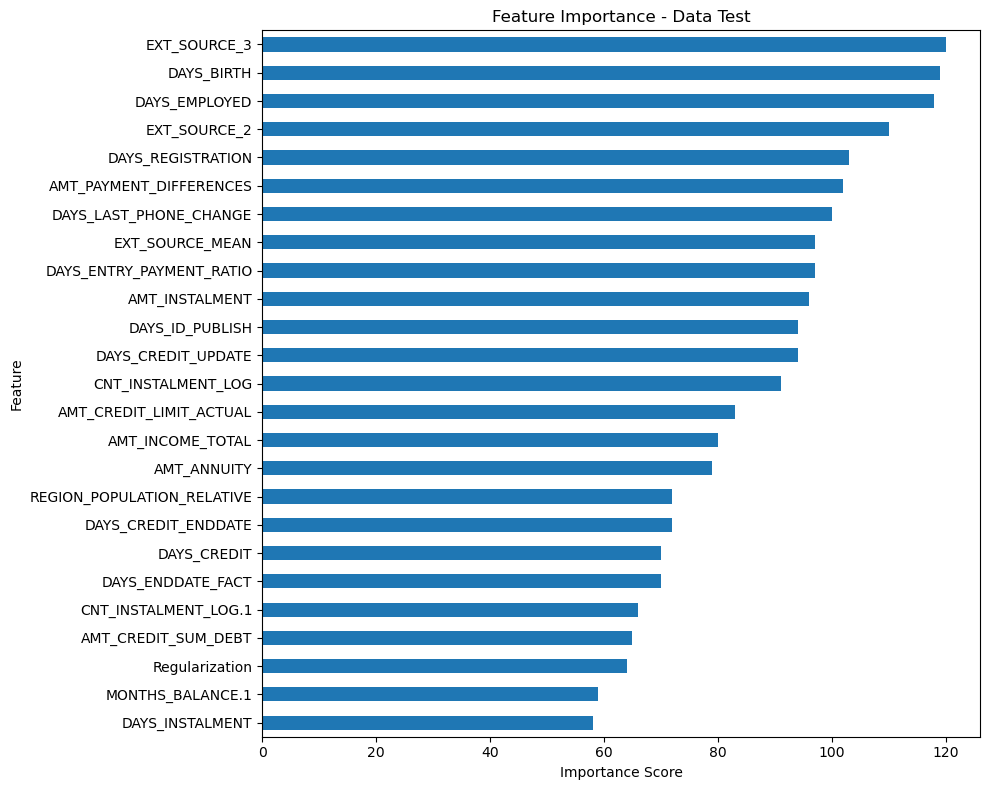

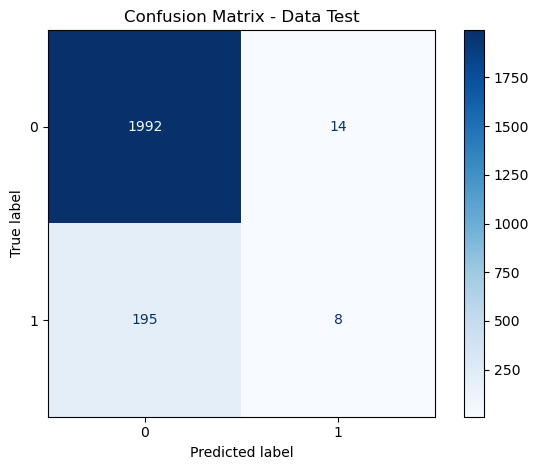

In [17]:
# Melatih model LightGBM
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train, y_train)

# Evaluasi model
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print('Accuracy (Train Set)    : %.2f' % accuracy_score(y_train, y_pred_train))
    print('Accuracy (Test Set)     : %.2f' % accuracy_score(y_test, y_pred))
    print('Precision (Train Set)   : %.2f' % precision_score(y_train, y_pred_train))
    print('Precision (Test Set)    : %.2f' % precision_score(y_test, y_pred))
    print('Recall (Train Set)      : %.2f' % recall_score(y_train, y_pred_train))
    print('Recall (Test Set)       : %.2f' % recall_score(y_test, y_pred))
    print('F1-Score (Train Set)    : %.2f' % f1_score(y_train, y_pred_train))
    print('F1-Score (Test Set)     : %.2f' % f1_score(y_test, y_pred))
    print('ROC-AUC (Train-Proba)   : %.2f' % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print('ROC-AUC (Test-Proba)    : %.2f' % roc_auc_score(y_test, y_pred_proba[:, 1]))

eval_classification(lgb)

# Menampilkan fitur yang paling penting berdasarkan model
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance - Data Test')
    plt.tight_layout()
    plt.show()

show_feature_importance(lgb)

# Menampilkan confusion matrix untuk hasil prediksi
def show_confusion_matrix(model):
    cm = confusion_matrix(y_test, model.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix - Data Test')
    plt.tight_layout()
    plt.show()

show_confusion_matrix(lgb)

In [18]:
def calculate_default_rate(model, X, y, dataset_name="dataset", threshold=0.5):
    """
    Menghitung default rate berdasarkan probabilitas yang diprediksi oleh model.
    
    Parameter:
    - model: Model yang sudah dilatih untuk melakukan prediksi.
    - X: Fitur untuk dataset (train atau test).
    - y: Nilai target yang sesungguhnya (1 = default, 0 = tidak default).
    - dataset_name: Nama dataset yang sedang dievaluasi (train atau test).
    - threshold: Batas probabilitas untuk menentukan prediksi default (default: 0.5).
    
    Output:
    - default_rate: Proporsi prediksi default pada dataset yang diberikan.
    """
    # Mendapatkan probabilitas prediksi untuk kelas 1 (default)
    y_pred_proba = model.predict_proba(X)[:, 1]
    
    # Mengonversi probabilitas menjadi prediksi default
    y_pred_default = (y_pred_proba > threshold).astype(int)
    
    # Menghitung jumlah prediksi default dan total
    default_count = sum(y_pred_default)
    total_count = len(y_pred_default)
    
    # Menghitung default rate
    default_rate = default_count / total_count if total_count > 0 else 0
    
    # Menampilkan hasil default rate
    print(f"Default rate untuk dataset {dataset_name}:")
    print(f"Jumlah prediksi default: {default_count}")
    print(f"Jumlah total: {total_count}")
    print(f"Tingkat default prediksi: {default_rate:.2%}")
    
    return default_rate

In [19]:
# Menghitung default rate untuk data train dan test
train_default_rate = calculate_default_rate(lgb, X_train, y_train, dataset_name="train")
test_default_rate = calculate_default_rate(lgb, X_test, y_test, dataset_name="test")

Default rate untuk dataset train:
Jumlah prediksi default: 592
Jumlah total: 8834
Tingkat default prediksi: 6.70%
Default rate untuk dataset test:
Jumlah prediksi default: 22
Jumlah total: 2209
Tingkat default prediksi: 1.00%


### SMOTE tanpa IQR

In [5]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Split dataset menjadi data train dan test
X = train_inner.drop(columns=['SK_ID_CURR', 'TARGET'])
y = train_inner['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# Terapkan SMOTE pada data train
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Cek distribusi kelas setelah SMOTE
print("Distribusi kelas setelah SMOTE:")
print(y_train_smote.value_counts(normalize=True))

Distribusi kelas setelah SMOTE:
TARGET
0    0.5
1    0.5
Name: proportion, dtype: float64


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7964, number of negative: 7964
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010265 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13903
[LightGBM] [Info] Number of data points in the train set: 15928, number of used features: 90
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy (Train Set)    : 0.97
Accuracy (Test Set)     : 0.89
Precision (Train Set)   : 1.00
Precision (Test Set)    : 0.27
Recall (Train Set)      : 0.93
Recall (Test Set)       : 0.05
F1-Score (Train Set)    : 0.96
F1-Score (Test Set)     : 0.08
ROC-AUC (Train-Proba)   : 1.00
ROC-AUC (Test-Proba)    : 0.69
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 870, number of negative: 7964
[LightGBM] [Info] Auto-c

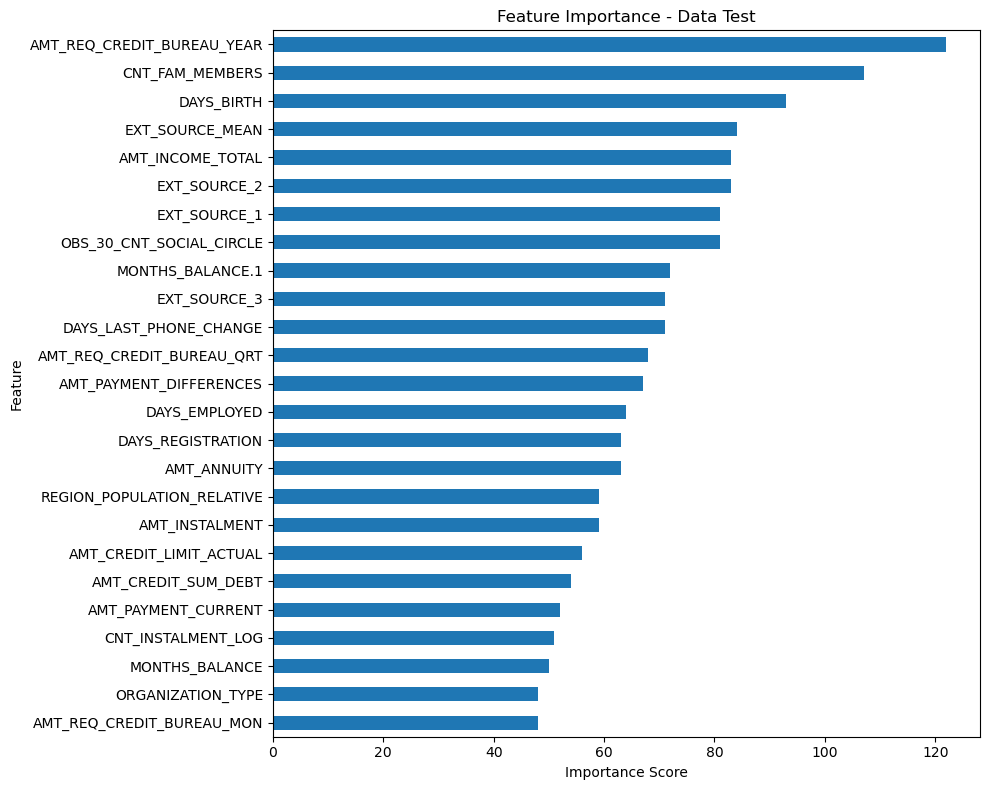

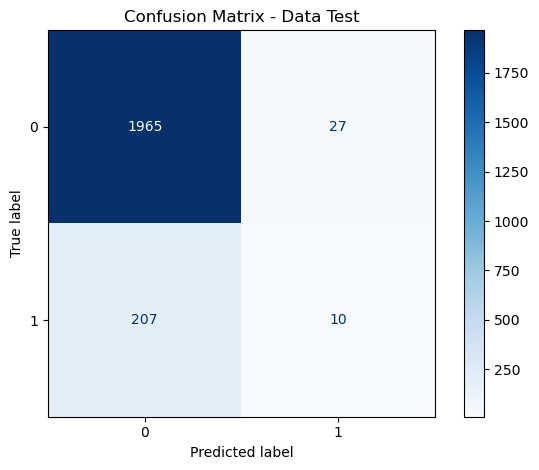

In [9]:
# Mengimpor SMOTE
from imblearn.over_sampling import SMOTE

# Mengaplikasikan SMOTE untuk mengatasi masalah ketidakseimbangan kelas pada data train
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Melatih model LightGBM dengan data yang sudah di-resample
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train_smote, y_train_smote)

# Evaluasi model dengan metrik seperti accuracy, precision, recall, dsb.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

def eval_classification(model):
    y_pred = model.predict(X_test)  # Prediksi untuk data test
    y_pred_train = model.predict(X_train_smote)  # Prediksi untuk data train yang sudah di-resample
    y_pred_proba = model.predict_proba(X_test)  # Probabilitas prediksi untuk data test
    y_pred_proba_train = model.predict_proba(X_train_smote)  # Probabilitas prediksi untuk data train yang sudah di-resample
    
    # Mencetak hasil evaluasi
    print('Accuracy (Train Set)    : %.2f' % accuracy_score(y_train_smote, y_pred_train))
    print('Accuracy (Test Set)     : %.2f' % accuracy_score(y_test, y_pred))

    print('Precision (Train Set)   : %.2f' % precision_score(y_train_smote, y_pred_train))
    print('Precision (Test Set)    : %.2f' % precision_score(y_test, y_pred))

    print('Recall (Train Set)      : %.2f' % recall_score(y_train_smote, y_pred_train))
    print('Recall (Test Set)       : %.2f' % recall_score(y_test, y_pred))

    print('F1-Score (Train Set)    : %.2f' % f1_score(y_train_smote, y_pred_train))
    print('F1-Score (Test Set)     : %.2f' % f1_score(y_test, y_pred))

    print('ROC-AUC (Train-Proba)   : %.2f' % roc_auc_score(y_train_smote, y_pred_proba_train[:, 1]))
    print('ROC-AUC (Test-Proba)    : %.2f' % roc_auc_score(y_test, y_pred_proba[:, 1]))

# Evaluasi model
eval_classification(lgb)

# Cross-validation untuk mengukur performa model secara lebih robust
from sklearn.model_selection import cross_validate
def score_cross_validate(model):
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('Recall (Crossval Train) : %.2f' % score['train_score'].mean())
    print('Recall (Crossval Test)  : %.2f' % score['test_score'].mean())

score_cross_validate(lgb)

# Menampilkan fitur yang paling penting berdasarkan model
import pandas as pd
import matplotlib.pyplot as plt

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()  # Membalik urutan fitur berdasarkan skor
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance - Data Test')
    plt.tight_layout()
    plt.show()

show_feature_importance(lgb)

# Menampilkan confusion matrix untuk hasil prediksi
def show_confusion_matrix(model):
    cm = confusion_matrix(y_test, model.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix - Data Test')
    plt.tight_layout()
    plt.show()

show_confusion_matrix(lgb)


In [10]:
def calculate_default_rate(model, X, y, dataset_name="dataset", threshold=0.5):
    """
    Menghitung default rate berdasarkan probabilitas yang diprediksi oleh model.
    
    Parameter:
    - model: Model yang sudah dilatih untuk melakukan prediksi.
    - X: Fitur untuk dataset (train atau test).
    - y: Nilai target yang sesungguhnya (1 = default, 0 = tidak default).
    - dataset_name: Nama dataset yang sedang dievaluasi (train atau test).
    - threshold: Batas probabilitas untuk menentukan prediksi default (default: 0.5).
    
    Output:
    - default_rate: Proporsi prediksi default pada dataset yang diberikan.
    """
    # Mendapatkan probabilitas prediksi untuk kelas 1 (default)
    y_pred_proba = model.predict_proba(X)[:, 1]
    
    # Mengonversi probabilitas menjadi prediksi default
    y_pred_default = (y_pred_proba > threshold).astype(int)
    
    # Menghitung jumlah prediksi default dan total
    default_count = sum(y_pred_default)
    total_count = len(y_pred_default)
    
    # Menghitung default rate
    default_rate = default_count / total_count if total_count > 0 else 0
    
    # Menampilkan hasil default rate
    print(f"Default rate untuk dataset {dataset_name}:")
    print(f"Jumlah prediksi default: {default_count}")
    print(f"Jumlah total: {total_count}")
    print(f"Tingkat default prediksi: {default_rate:.2%}")
    
    return default_rate

In [11]:
# Default rate untuk data train setelah SMOTE
calculate_default_rate(lgb, X_train_smote, y_train_smote, dataset_name="train (SMOTE)")

# Default rate untuk data test
calculate_default_rate(lgb, X_test, y_test, dataset_name="test")

Default rate untuk dataset train (SMOTE):
Jumlah prediksi default: 7437
Jumlah total: 15928
Tingkat default prediksi: 46.69%
Default rate untuk dataset test:
Jumlah prediksi default: 37
Jumlah total: 2209
Tingkat default prediksi: 1.67%


0.016749660479855138

### SMOTE dan IQR

In [12]:
# Melatih model LightGBM
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
import numpy as np
import pandas as pd

In [8]:
# Split dataset menjadi data train dan test
X = train_inner.drop(columns=['SK_ID_CURR', 'TARGET'])
y = train_inner['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Fungsi untuk menangani outliers dengan IQR (data train)
def handle_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap outliers pada data train
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

# Fungsi untuk menerapkan batas IQR pada data test berdasarkan data train
def apply_train_iqr_bounds(data, train_data, columns):
    for col in columns:
        Q1 = train_data[col].quantile(0.25)
        Q3 = train_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap outliers pada data test
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

# Terapkan IQR pada data train
columns_to_check = X_train.select_dtypes(include=[np.number]).columns  # Hanya kolom numerik
X_train = handle_outliers_iqr(X_train.copy(), columns_to_check)

# Terapkan capping pada data test menggunakan batas dari data train
X_test = apply_train_iqr_bounds(X_test.copy(), X_train, columns_to_check)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7964, number of negative: 7964
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004742 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13765
[LightGBM] [Info] Number of data points in the train set: 15928, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy (Train Set)    : 0.97
Accuracy (Test Set)     : 0.89
Precision (Train Set)   : 1.00
Precision (Test Set)    : 0.30
Recall (Train Set)      : 0.93
Recall (Test Set)       : 0.06
F1-Score (Train Set)    : 0.96
F1-Score (Test Set)     : 0.10
ROC-AUC (Train-Proba)   : 1.00
ROC-AUC (Test-Proba)    : 0.71
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 870, number of negative: 7964
[LightGBM] [Info] Auto-c

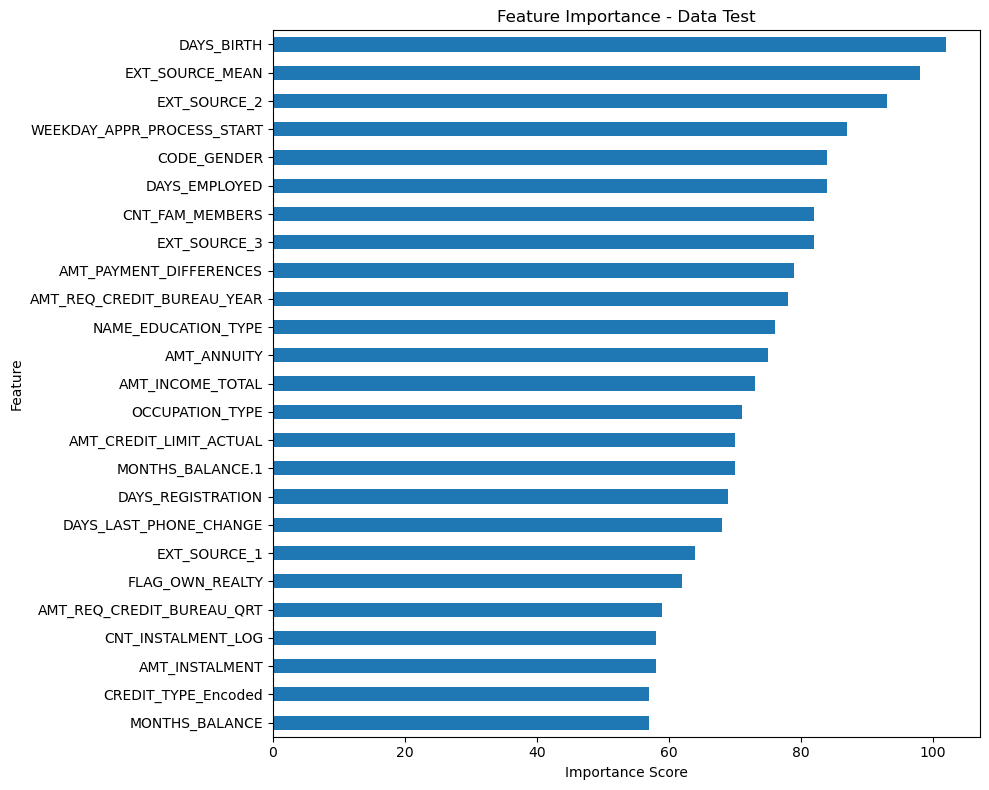

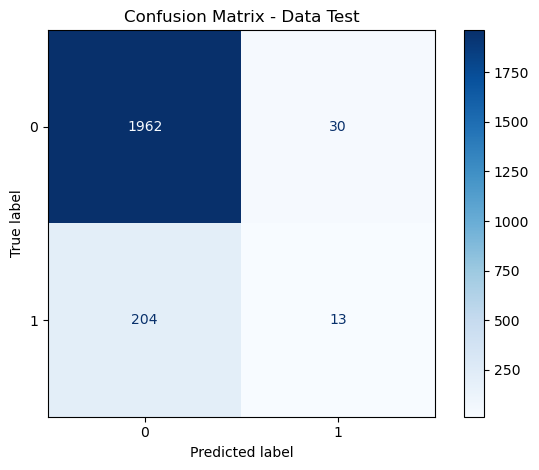

In [13]:
# Terapkan SMOTE setelah menghapus outliers
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Melatih model LightGBM
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train_resampled, y_train_resampled)

# Evaluasi model
def eval_classification(model):
    y_pred = model.predict(X_test)  # Prediksi untuk data test
    y_pred_train = model.predict(X_train_resampled)  # Prediksi untuk data train
    y_pred_proba = model.predict_proba(X_test)  # Probabilitas prediksi untuk data test
    y_pred_proba_train = model.predict_proba(X_train_resampled)  # Probabilitas prediksi untuk data train
    
    # Mencetak hasil evaluasi
    print('Accuracy (Train Set)    : %.2f' % accuracy_score(y_train_resampled, y_pred_train))
    print('Accuracy (Test Set)     : %.2f' % accuracy_score(y_test, y_pred))

    print('Precision (Train Set)   : %.2f' % precision_score(y_train_resampled, y_pred_train))
    print('Precision (Test Set)    : %.2f' % precision_score(y_test, y_pred))

    print('Recall (Train Set)      : %.2f' % recall_score(y_train_resampled, y_pred_train))
    print('Recall (Test Set)       : %.2f' % recall_score(y_test, y_pred))

    print('F1-Score (Train Set)    : %.2f' % f1_score(y_train_resampled, y_pred_train))
    print('F1-Score (Test Set)     : %.2f' % f1_score(y_test, y_pred))

    print('ROC-AUC (Train-Proba)   : %.2f' % roc_auc_score(y_train_resampled, y_pred_proba_train[:, 1]))
    print('ROC-AUC (Test-Proba)    : %.2f' % roc_auc_score(y_test, y_pred_proba[:, 1]))

# Evaluasi model
eval_classification(lgb)

# Cross-validation untuk mengukur performa model secara lebih robust
def score_cross_validate(model):
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('Recall (Crossval Train) : %.2f' % score['train_score'].mean())
    print('Recall (Crossval Test)  : %.2f' % score['test_score'].mean())

score_cross_validate(lgb)

# Menampilkan fitur yang paling penting berdasarkan model
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()  # Membalik urutan fitur berdasarkan skor
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance - Data Test')
    plt.tight_layout()
    plt.show()

show_feature_importance(lgb)

# Menampilkan confusion matrix untuk hasil prediksi
def show_confusion_matrix(model):
    cm = confusion_matrix(y_test, model.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix - Data Test')
    plt.tight_layout()
    plt.show()

show_confusion_matrix(lgb)

In [16]:
# Menghitung default rate berdasarkan probabilitas
def calculate_default_rate(model, X, y, dataset_name="dataset", threshold=0.5):
    """
    Menghitung default rate berdasarkan probabilitas yang diprediksi oleh model.
    
    Parameter:
    - model: Model yang sudah dilatih untuk melakukan prediksi.
    - X: Fitur untuk dataset (train atau test).
    - y: Nilai target yang sesungguhnya (1 = default, 0 = tidak default).
    - dataset_name: Nama dataset yang sedang dievaluasi (train atau test).
    - threshold: Batas probabilitas untuk menentukan prediksi default (default: 0.5).
    
    Output:
    - default_rate: Proporsi prediksi default pada dataset yang diberikan.
    """
    # Mendapatkan probabilitas prediksi untuk kelas 1 (default)
    y_pred_proba = model.predict_proba(X)[:, 1]
    
    # Mengonversi probabilitas menjadi prediksi default
    y_pred_default = (y_pred_proba > threshold).astype(int)
    
    # Menghitung jumlah prediksi default dan total
    default_count = sum(y_pred_default)
    total_count = len(y_pred_default)
    
    # Menghitung default rate
    default_rate = default_count / total_count if total_count > 0 else 0
    
    # Menampilkan hasil default rate
    print(f"Default rate untuk dataset {dataset_name}:")
    print(f"Jumlah prediksi default: {default_count}")
    print(f"Jumlah total: {total_count}")
    print(f"Tingkat default prediksi: {default_rate:.2%}")
    
    return default_rate

# Hitung default rate setelah model dievaluasi pada dataset train dan test
print("\nHasil Default Rate pada Dataset Train:")
calculate_default_rate(lgb, X_train_resampled, y_train_resampled, dataset_name="Train Set")

# Hitung default rate setelah model dievaluasi
calculate_default_rate(lgb, X_test, y_test, dataset_name="Test Set")


Hasil Default Rate pada Dataset Train:
Default rate untuk dataset Train Set:
Jumlah prediksi default: 7432
Jumlah total: 15928
Tingkat default prediksi: 46.66%
Default rate untuk dataset Test Set:
Jumlah prediksi default: 43
Jumlah total: 2209
Tingkat default prediksi: 1.95%


0.019465821638750568

### IQR, SMOTE, Hyperparameter tuning

In [3]:
# Melatih model LightGBM
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_validate
import numpy as np
import pandas as pd

In [4]:
# Split dataset menjadi data train dan test
X = train_inner.drop(columns=['SK_ID_CURR', 'TARGET'])
y = train_inner['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
# Fungsi untuk menangani outliers menggunakan IQR pada data train
def handle_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Capping outliers pada data train
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

# Fungsi untuk menerapkan batas IQR yang dihitung dari data train ke data test
def apply_train_iqr_bounds(data, train_data, columns):
    for col in columns:
        Q1 = train_data[col].quantile(0.25)
        Q3 = train_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Capping outliers pada data test
        data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])
        data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    return data

In [9]:
# 3. Menangani Outliers menggunakan IQR pada data train
columns_to_check = X_train.select_dtypes(include=[np.number]).columns
X_train = handle_outliers_iqr(X_train.copy(), columns_to_check)
X_test = apply_train_iqr_bounds(X_test.copy(), X_train, columns_to_check)

# 4. Menggunakan SMOTE untuk menangani ketidakseimbangan kelas di data train
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [10]:
# 5. Melakukan Hyperparameter Tuning untuk LightGBM menggunakan GridSearchCV
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

def tune_hyperparameters(X_train, y_train):
    param_grid = {
        'num_leaves': [31, 50, 70],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 200],
        'max_depth': [-1, 10, 20]
    }

    grid_search = GridSearchCV(estimator=LGBMClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_}")
    
    return grid_search.best_estimator_

best_model = tune_hyperparameters(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 7964, number of negative: 7964
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13765
[LightGBM] [Info] Number of data points in the train set: 15928, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best parameters: {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200, 'num_leaves': 70}
Best cross-validation score: 0.9396097212363802


In [11]:
# 6. Evaluasi Model: Metrik Accuracy, Precision, Recall, F1-Score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print('Accuracy (Train Set)    : %.2f' % accuracy_score(y_train, y_pred_train))
    print('Accuracy (Test Set)     : %.2f' % accuracy_score(y_test, y_pred))
    print('Precision (Train Set)   : %.2f' % precision_score(y_train, y_pred_train))
    print('Precision (Test Set)    : %.2f' % precision_score(y_test, y_pred))
    print('Recall (Train Set)      : %.2f' % recall_score(y_train, y_pred_train))
    print('Recall (Test Set)       : %.2f' % recall_score(y_test, y_pred))
    print('F1-Score (Train Set)    : %.2f' % f1_score(y_train, y_pred_train))
    print('F1-Score (Test Set)     : %.2f' % f1_score(y_test, y_pred))
    print('ROC-AUC (Train-Proba)   : %.2f' % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print('ROC-AUC (Test-Proba)    : %.2f' % roc_auc_score(y_test, y_pred_proba[:, 1]))

eval_classification(best_model, X_train_resampled, y_train_resampled, X_test, y_test)

Accuracy (Train Set)    : 1.00
Accuracy (Test Set)     : 0.90
Precision (Train Set)   : 1.00
Precision (Test Set)    : 0.30
Recall (Train Set)      : 1.00
Recall (Test Set)       : 0.04
F1-Score (Train Set)    : 1.00
F1-Score (Test Set)     : 0.07
ROC-AUC (Train-Proba)   : 1.00
ROC-AUC (Test-Proba)    : 0.71


In [12]:
# Cross-Validation untuk Mengukur Performa Model
def score_cross_validate(model, X, y):
    score = cross_validate(model, X, y, cv=5, scoring='recall', return_train_score=True)
    print('Recall (Crossval Train) : %.2f' % score['train_score'].mean())
    print('Recall (Crossval Test)  : %.2f' % score['test_score'].mean())

# Menjalankan cross-validation pada model terbaik
score_cross_validate(best_model, X_train_resampled, y_train_resampled)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 6371, number of negative: 6371
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13764
[LightGBM] [Info] Number of data points in the train set: 12742, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

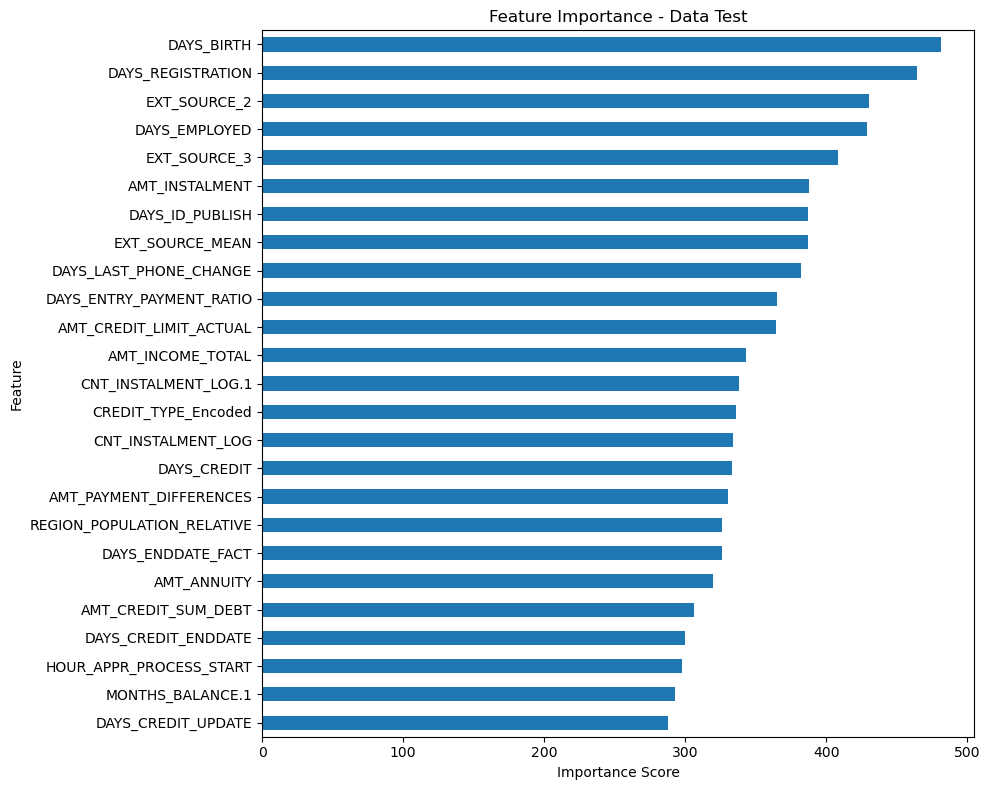

In [13]:
# Menampilkan Fitur yang Paling Penting Berdasarkan Model

def show_feature_importance(model, X):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()  # Membalik urutan fitur berdasarkan skor
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance - Data Test')
    plt.tight_layout()
    plt.show()

# Menampilkan fitur penting untuk model yang sudah di-tune
show_feature_importance(best_model, X_train_resampled)


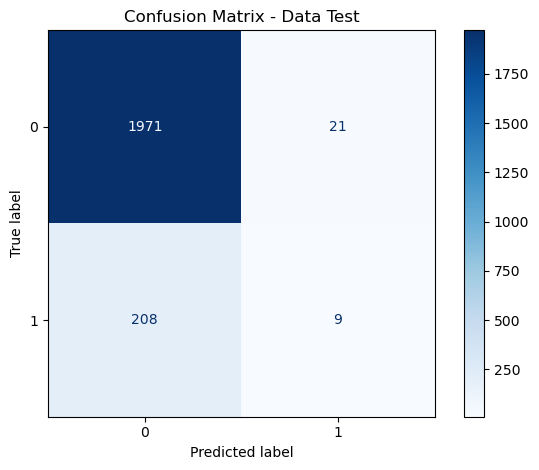

In [14]:
# Menampilkan Confusion Matrix untuk Hasil Prediksi

def show_confusion_matrix(model, X_test, y_test):
    cm = confusion_matrix(y_test, model.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix - Data Test')
    plt.tight_layout()
    plt.show()

# Menampilkan confusion matrix untuk data test
show_confusion_matrix(best_model, X_test, y_test)

In [16]:
# Menghitung Default Rate pada Data Train dan Test
def calculate_default_rate(model, X, y, dataset_name="dataset", threshold=0.5):
    y_pred_proba = model.predict_proba(X)[:, 1]
    y_pred_default = (y_pred_proba > threshold).astype(int)
    
    default_count = sum(y_pred_default)
    total_count = len(y_pred_default)
    
    default_rate = default_count / total_count if total_count > 0 else 0
    
    print(f"Default rate untuk dataset {dataset_name}:")
    print(f"Jumlah prediksi default: {default_count}")
    print(f"Jumlah total: {total_count}")
    print(f"Tingkat default prediksi: {default_rate:.2%}")
    
    return default_rate

# Hitung default rate untuk data train dan test
print("\nHasil Default Rate pada Dataset Train:")
calculate_default_rate(best_model, X_train_resampled, y_train_resampled, dataset_name="Train Set")

print("\nHasil Default Rate pada Dataset Test:")
calculate_default_rate(best_model, X_test, y_test, dataset_name="Test Set")


Hasil Default Rate pada Dataset Train:
Default rate untuk dataset Train Set:
Jumlah prediksi default: 7964
Jumlah total: 15928
Tingkat default prediksi: 50.00%

Hasil Default Rate pada Dataset Test:
Default rate untuk dataset Test Set:
Jumlah prediksi default: 30
Jumlah total: 2209
Tingkat default prediksi: 1.36%


0.013580805794477138

# Train Left

In [10]:
train_left = pd.read_csv('application_train_left_merged.csv')

train_left.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,NAME_CONTRACT_STATUS_Signed,MONTHS_BALANCE,MONTHS_BALANCE.1,CNT_INSTALMENT_LOG,CNT_INSTALMENT_LOG.1,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,DAYS_ENTRY_PAYMENT_RATIO,AMT_PAYMENT_DIFFERENCES
0,100002,1,0,1,0,1,12.218495,6,6,4,...,NaN,1.266472,0.614296,0.454953,8.644114,0.977391,0.963834,9.132571,0.080863,0.188409
1,100003,0,0,0,0,0,12.506177,1,4,1,...,NaN,0.652659,-1.610776,-1.178655,-33.002352,-1.280663,-1.279021,8.814491,0.003083,0.188409
2,100006,0,0,0,0,1,11.813030,6,6,4,...,0.0,1.266472,0.575933,-0.411641,-8.644451,0.762046,0.713660,8.179031,0.094196,0.188409
3,100007,0,0,1,0,1,11.707670,6,6,4,...,NaN,1.266472,-1.610776,-0.265003,-17.490185,0.093113,0.099433,9.112194,0.007294,0.038379
4,100008,0,0,1,0,1,11.502875,5,4,4,...,NaN,1.266472,-1.879320,-0.906729,-75.258493,-0.227749,-0.183649,9.595581,-0.006977,0.071494


In [11]:
train_left.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187484 entries, 0 to 187483
Columns: 109 entries, SK_ID_CURR to AMT_PAYMENT_DIFFERENCES
dtypes: float64(60), int64(49)
memory usage: 155.9 MB


In [9]:
train_left.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
                            ...  
DAYS_INSTALMENT             11890
DAYS_ENTRY_PAYMENT          11890
AMT_INSTALMENT              11890
DAYS_ENTRY_PAYMENT_RATIO    11890
AMT_PAYMENT_DIFFERENCES     11890
Length: 109, dtype: int64

In [10]:
train_left.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
187479    False
187480    False
187481    False
187482    False
187483    False
Length: 187484, dtype: bool

### Default Rate_Left

In [12]:
# nama dataset = application_train_left_merged

# Hitung total peminjam
total_peminjam = len(train_left)

# Hitung jumlah peminjam yang default (TARGET = 1)
jumlah_default = train_left['TARGET'].sum()

# Hitung default rate
default_rate_left = (jumlah_default / total_peminjam) * 100

print(f'Default Rate_Left Join: {default_rate_left:.2f}%')

Default Rate_Left Join: 9.33%


### Distribusi Target : Left Join

In [13]:
# Menghitung berapa banyak jumlah 0 dan 1 pada TARGET

target_counts_left = train_left['TARGET'].value_counts()
print(target_counts_left)

TARGET
0    169986
1     17498
Name: count, dtype: int64


### Proporsi Target_Left Join

In [18]:
# Untuk mengetahui ketidakseimbangan data

target_proportions_left = train_left['TARGET'].value_counts(normalize=True)
print(target_proportions_left)

TARGET
0    0.906669
1    0.093331
Name: proportion, dtype: float64
